<a href="https://colab.research.google.com/github/alexander-toschev/mbzuai-course/blob/main/AudioPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **1️⃣ Why Audio Pre-Processing Matters?**

- **Improves speech recognition & music classification**
- **Reduces noise for better feature extraction**
- **Prepares audio for ML models (STT, Speaker ID, etc.)**

### **2️⃣ Key Steps in Audio Pre-Processing**

✅ **Noise Reduction** – Remove background interference
✅ **Silence Removal** – Trim unnecessary silence
✅ **Resampling & Normalization** – Standardize sample rates & amplitude
✅ **Feature Extraction** – Convert audio to useful features (MFCC, Spectrograms)

### **3️⃣ Common Techniques & Libraries**

🔹 **Librosa** – Feature extraction (MFCC, Spectrograms)
🔹 **PyDub** – Audio slicing & augmentation
🔹 **Wavelet Denoising** – Reduce background noise

### **4️⃣ Live Demo: Cleaning & Feature Extraction**






In [2]:
!pip install AudioSegment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp311-cp311-linux_x86_64.whl size=73498 sha256=2fde8b3c91899c1dd506a819ab8c006f4258998dafeb7674257abb04790e24e4
  Stored in directory: /root/.cache/pip/wheels/94/65/3f/292d0b656be33d1c801831201c74b5f68f41a2ae465ff2ee2f
Successfully built webrtcvad


In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment

# Load MP3 file from GitHub and convert to WAV
audio_url = "https://github.com/alexander-toschev/mbzuai-course/blob/main/audio/12_43%20PM%20%20Telegram%20meeting%20March%205.mp3?raw=true"
audio_path = "speaker_audio.mp3"
response = requests.get(audio_url)
with open(audio_path, "wb") as f:
    f.write(response.content)

mp3_audio = AudioSegment.from_mp3(audio_path)
wav_path = "converted_speaker.wav"
mp3_audio.export(wav_path, format="wav")

<_io.BufferedRandom name='converted_speaker.wav'>

<ipython-input-7-dd3df0187fd1>:12: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(signal), ref=np.max),


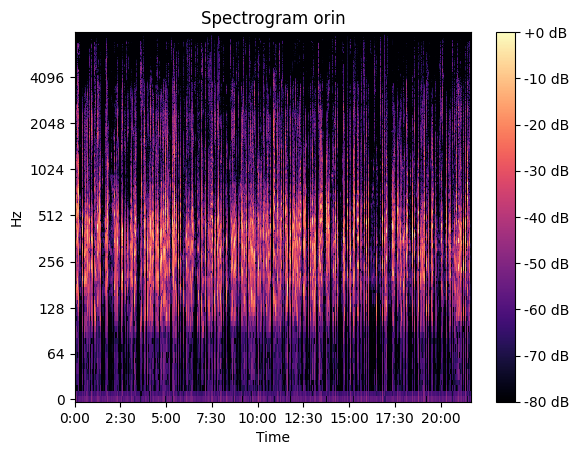

<ipython-input-7-dd3df0187fd1>:21: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(denoised_signal), ref=np.max),


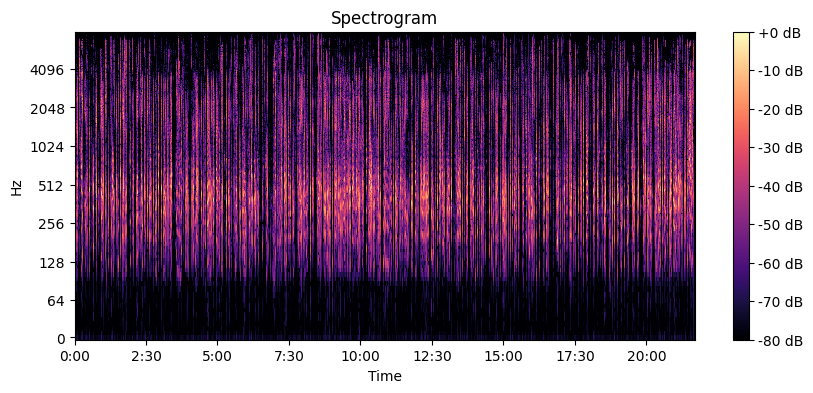

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment


wav_path = "converted_speaker.wav"

# Load and process WAV file
signal, sr = librosa.load(wav_path, sr=16000)
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(signal), ref=np.max),
                         sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram orin")
plt.colorbar(format='%+2.0f dB')
plt.show()
denoised_signal = librosa.effects.preemphasis(signal)

# Generate Spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.amplitude_to_db(librosa.stft(denoised_signal), ref=np.max),
                         sr=sr, x_axis='time', y_axis='log')
plt.title("Spectrogram")
plt.colorbar(format='%+2.0f dB')
plt.show()

### **5️⃣ Speaker Detection Example**

💻 **Example Code: Extracting MFCC Features for Speaker Identification**



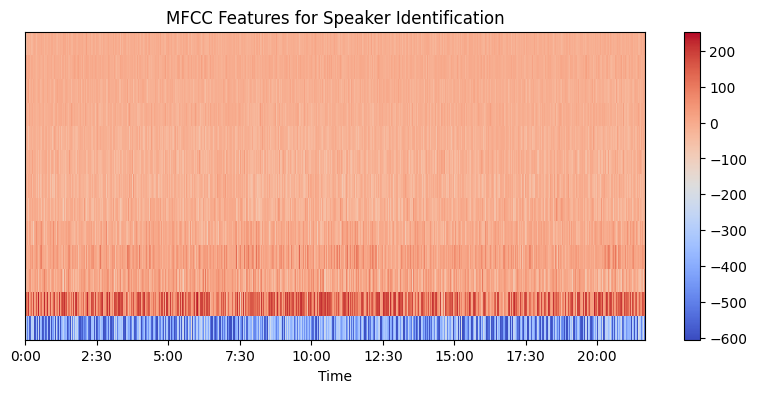

In [8]:
import librosa
import numpy as np
import requests
from pydub import AudioSegment



# Load audio file
signal, sr = librosa.load(wav_path, sr=16000)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

# Display MFCC features
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCC Features for Speaker Identification")
plt.show()



📌 **Explanation:**

- **MFCC (Mel-Frequency Cepstral Coefficients)** are commonly used to analyze speech.
- Extracting MFCCs helps **differentiate speakers** based on their vocal characteristics.

### **6️⃣ Applications of Audio Pre-Processing**

🎙️ **Speech-to-Text (STT) & Speaker Identification**\
🎼 **Music Genre Classification & Sound Event Detection**\
📞 **Noise Cancellation in Calls & Voice Assistants**

### **7️⃣ Summary & Next Steps**

- **Pre-processing is essential for clean feature extraction**
- **Feature engineering (MFCC, Spectrograms) is key for ML models**
- **Use libraries like Librosa & PyDub for fast audio processing**

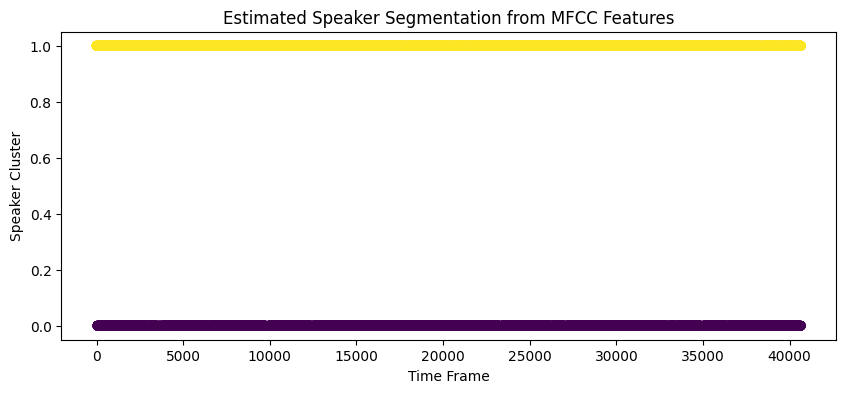

In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load audio file
signal, sr = librosa.load("converted_speaker.wav", sr=16000)

# Extract MFCC features
mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
mfccs = mfccs.T  # Transpose for clustering

# Apply K-Means to segment different speakers
num_speakers = 2  # Set an expected number of speakers (adjustable)
kmeans = KMeans(n_clusters=num_speakers, random_state=42).fit(mfccs)

# Visualize Speaker Segmentation
plt.figure(figsize=(10, 4))
plt.scatter(range(len(mfccs)), kmeans.labels_, c=kmeans.labels_, cmap="viridis")
plt.title("Estimated Speaker Segmentation from MFCC Features")
plt.xlabel("Time Frame")
plt.ylabel("Speaker Cluster")
plt.show()
